## Problem 2-a

In [1]:
from sympy import * 
import numpy as np

In [2]:
init_printing()

In [3]:
# first define the f(x)
x = Symbol('x')
f = 3*x**2 + 2*x + 2
f
# carry out integration 

result = integrate(f, (x, -4, 6))
print("using sympy, the result is ", result)



using sympy, the result is  320


In [4]:
N = Symbol("N")
b = 6
a  = -4

# make a trapezoid function
def trapezoid(N):
    
    # calculate the width of each subinterval
    dx = (b-a)/N
    
    # generate N+1 equally spaced points between -4 and 6
    x_k = np.linspace(-4,6,N+1)
   
    # conver the symbolic expression f to a numpy-compatible function
    f_X = lambdify( x, f , 'numpy')
    
   
    # compute the trapezoid rule approximation
    return dx * ( sum( f_X(x_k[1:N]) ) + 0.5 * ( f_X(x_k[0]) + f_X(x_k[N]) )  )
    



In [5]:
N_list = [10,20,40,80,160,320,640,1280]
approximation = []
approximations = []
for n in N_list:
    approximation= trapezoid(n)
    
    approximations.append(approximation)
    print(f"N = {n}: approximation is {approximation}")


N = 10: approximation is 325.0
N = 20: approximation is 321.25
N = 40: approximation is 320.3125
N = 80: approximation is 320.078125
N = 160: approximation is 320.01953125
N = 320: approximation is 320.0048828125
N = 640: approximation is 320.001220703125
N = 1280: approximation is 320.00030517578125


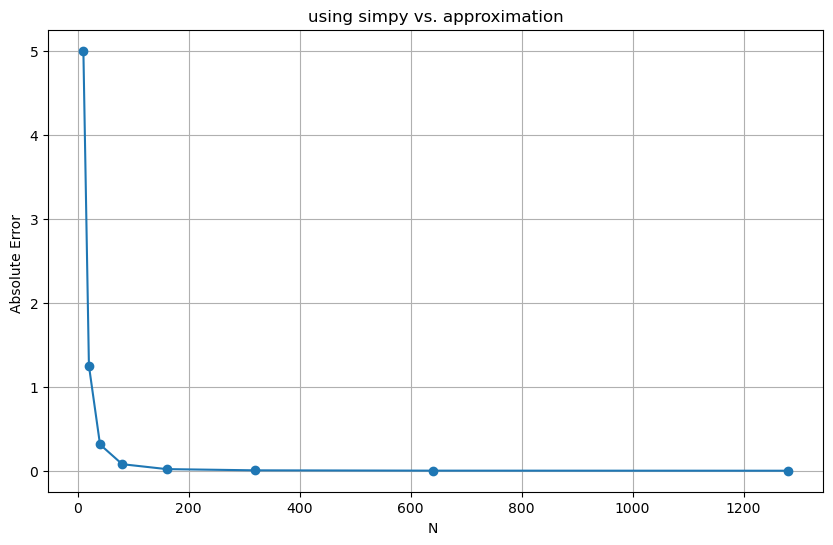

In [8]:

import matplotlib.pyplot as plt
absolute_errors = [abs(result - approx) for approx in approximations]

# Plot the absolute error against N
plt.figure(figsize=(10, 6))
plt.plot(N_list, absolute_errors, marker='o')

plt.title('using simpy vs. approximation')
plt.xlabel('N ')
plt.ylabel('Absolute Error ')
plt.grid()
plt.show()

## Problem 3

In [37]:
import pandas as pd

In [38]:
 print(pd.Series(np.random.randint(1000, 10001, size = 3)))

0    6660
1    9055
2    6686
dtype: int64


In [39]:
# Create a 3x4 Pandas DataFrame
towns = ['Hempstead', 'Babylon', 'Islip', 'Brookhaven']
years = ['Population in 2099', 'Population in 2300', 'Population in 2400']
data = np.random.randint(1000, 10001, size=(3, 4))
df = pd.DataFrame(data, columns=towns, index=years)

# Output the entire DataFrame 
print("Entire DataFrame:")
print(df)



Entire DataFrame:
                    Hempstead  Babylon  Islip  Brookhaven
Population in 2099       2024     9896   9466        2396
Population in 2300       3232     1545   3161        9021
Population in 2400       9060     4044   3779        7655


In [40]:
df

,Hempstead,Babylon,Islip,Brookhaven
Population in 2099,2024,9896,9466,2396
Population in 2300,3232,1545,3161,9021
Population in 2400,9060,4044,3779,7655


In [41]:
# the value in the cell of row #1 under the Hempstead column
print("\nValue in the cell of row #1 under the Hempstead column:", df['Hempstead'][1])

# Add a new column named Riverhead
df['Riverhead'] = df['Islip'] + df['Brookhaven']

# Output the entire DataFrame with the new column
print("\nDataFrame with the Riverhead column:")
print(df)


Value in the cell of row #1 under the Hempstead column: 3232

DataFrame with the Riverhead column:
                    Hempstead  Babylon  Islip  Brookhaven  Riverhead
Population in 2099       2024     9896   9466        2396      11862
Population in 2300       3232     1545   3161        9021      12182
Population in 2400       9060     4044   3779        7655      11434


In [42]:
df

,Hempstead,Babylon,Islip,Brookhaven,Riverhead
Population in 2099,2024,9896,9466,2396,11862
Population in 2300,3232,1545,3161,9021,12182
Population in 2400,9060,4044,3779,7655,11434


## Problem 4

In [43]:
# Read the CSV file into a DataFrame
df = pd.read_csv('customers-100.csv')
df.head()



,Index,Customer Id,First Name,Last Name,Company,City,Country,Phone 1,Phone 2,Email,Subscription Date,Website
0,1,DD37Cf93aecA6Dc,Sheryl,Baxter,Rasmussen Group,East Leonard,Chile,229.077.5154,397.884.0519x718,zunigavanessa@smith.info,2020-08-24,http://www.stephenson.com/
1,2,1Ef7b82A4CAAD10,Preston,Lozano,Vega-Gentry,East Jimmychester,Djibouti,5153435776,686-620-1820x944,vmata@colon.com,2021-04-23,http://www.hobbs.com/
2,3,6F94879bDAfE5a6,Roy,Berry,Murillo-Perry,Isabelborough,Antigua and Barbuda,+1-539-402-0259,(496)978-3969x58947,beckycarr@hogan.com,2020-03-25,http://www.lawrence.com/
3,4,5Cef8BFA16c5e3c,Linda,Olsen,"Dominguez, Mcmillan and Donovan",Bensonview,Dominican Republic,001-808-617-6467x12895,+1-813-324-8756,stanleyblackwell@benson.org,2020-06-02,http://www.good-lyons.com/
4,5,053d585Ab6b3159,Joanna,Bender,"Martin, Lang and Andrade",West Priscilla,Slovakia (Slovak Republic),001-234-203-0635x76146,001-199-446-3860x3486,colinalvarado@miles.net,2021-04-17,https://goodwin-ingram.com/


In [44]:
#arrange the data in alphabetical order based on the last name
df.sort_values('Last Name').head()


,Index,Customer Id,First Name,Last Name,Company,City,Country,Phone 1,Phone 2,Email,Subscription Date,Website
67,68,a014Ec1b9FccC1E,Tom,Alvarado,Donaldson-Dougherty,South Sophiaberg,Kiribati,(585)606-2980x2258,730-797-3594x5614,nicholsonnina@montgomery.info,2020-08-18,http://odom-massey.com/
96,97,CeD220bdAaCfaDf,Lynn,Atkinson,"Ware, Burns and Oneal",New Bradview,Sri Lanka,+1-846-706-2218,605.413.3198,vkemp@ferrell.com,2021-07-10,https://novak-allison.com/
92,93,aAb6AFc7AfD0fF3,Collin,Ayers,Lamb-Peterson,South Lonnie,Anguilla,404-645-5351x012,001-257-582-8850x8516,dudleyemily@gonzales.biz,2021-06-29,http://www.ruiz.com/
0,1,DD37Cf93aecA6Dc,Sheryl,Baxter,Rasmussen Group,East Leonard,Chile,229.077.5154,397.884.0519x718,zunigavanessa@smith.info,2020-08-24,http://www.stephenson.com/
15,16,8cad0b4CBceaeec,Miranda,Beasley,Singleton and Sons,Desireeshire,Oman,540.085.3135x185,+1-600-462-6432x21881,vduncan@parks-hardy.com,2022-04-12,http://acosta.org/


In [45]:

# make a new dataframe whose whose subscription date is in 2021
count_data = df[(df['Subscription Date'] >= '2021-01-01') & (df['Subscription Date'] <= '2021-12-31')]
# count the number of customers by using this new dataframe
count = len(count_data)

# Print the count
print("\nNumber of customers with a subscription date in 2021:", count)



Number of customers with a subscription date in 2021: 43


## Problem-6 Markov Chain

In [46]:
np.random.seed(3)  

# Construct a random 5x5 matrix P 
P = np.random.rand(5, 5)

# normalize each row
P = P / P.sum(axis=1, keepdims=True)
print(P)

# Construct a random size-5 vector p and normalize it
p = np.random.rand(5)
p = p / p.sum()

# apply the transition rule 50 times to obtain p50
new_p = p
for i in range(50): #using for loop to apply the transition rule 50 times
     new_p = np.dot(P.transpose(), new_p)
print(p)
print(new_p)

#part 3:Eigenvalues and Eigenvectors




[[0.186482   0.23975549 0.09849075 0.17294938 0.30232238]
 [0.52067733 0.0729554  0.12039217 0.02989849 0.25607661]
 [0.01429076 0.21851821 0.31050674 0.13320954 0.32347475]
 [0.31972189 0.01297684 0.30240164 0.14028414 0.22461549]
 [0.13382451 0.32716273 0.20789519 0.07404194 0.25707562]]
[0.29636058 0.1163557  0.08429876 0.14735001 0.35563495]
[0.21972728 0.20212093 0.1962758  0.10545074 0.27642524]


In [47]:
## Eigenvalues and Eigenvectors
P_T = P.transpose()
eigenvalues, eigenvectors = np.linalg.eig(P_T)
# print("values", eigenvalues)
# print("vector ", eigenvectors)

# to find the index of the eigenvector of v corresponding to the eigenvalue 1

ind = np.argmin(np.abs(eigenvalues-1))

# compute the stationary distribution
stationary_dis = np.real(eigenvectors[:, ind])
stationary_dis /= np.sum(stationary_dis)


# Compute the difference between new_p and the stationary distribution
difference = np.abs(new_p - stationary_dis)
matching = np.all(difference < 1e-5)

print(f"Matrix P:\n{P}\n")
print(f"Vector p:\n{p}\n")
print(f"p_50:\n{p}\n")
print(f"Stationary distribution v:\n{stationary_dis}\n")
print(f"Component-wise difference:\n{difference}\n")
print(f"Do they match within 1e-5? {matching}")

Matrix P:
[[0.186482   0.23975549 0.09849075 0.17294938 0.30232238]
 [0.52067733 0.0729554  0.12039217 0.02989849 0.25607661]
 [0.01429076 0.21851821 0.31050674 0.13320954 0.32347475]
 [0.31972189 0.01297684 0.30240164 0.14028414 0.22461549]
 [0.13382451 0.32716273 0.20789519 0.07404194 0.25707562]]

Vector p:
[0.29636058 0.1163557  0.08429876 0.14735001 0.35563495]

p_50:
[0.29636058 0.1163557  0.08429876 0.14735001 0.35563495]

Stationary distribution v:
[0.21972728 0.20212093 0.1962758  0.10545074 0.27642524]

Component-wise difference:
[1.11022302e-16 0.00000000e+00 0.00000000e+00 9.71445147e-17
 5.55111512e-17]

Do they match within 1e-5? True
